In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [4]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
X = X.values
X.shape

(4177, 9)

In [6]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(4177, 9, 1)

In [8]:
print(X.dtype)
print(Y.dtype)

object
float32


In [9]:
X = X.astype('float32')

In [10]:
X.dtype

dtype('float32')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Conv1D 모델 생성
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))  # 분류 문제일 경우

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/30


2024-09-25 22:07:33.804312: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


105/105 [==============================] - 0s 2ms/step - loss: 0.0333 - mae: 0.0688 - val_loss: 0.0322 - val_mae: 0.0643
Epoch 2/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - mae: 0.0645 - val_loss: 0.0322 - val_mae: 0.0649
Epoch 3/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - mae: 0.0645 - val_loss: 0.0322 - val_mae: 0.0642
Epoch 4/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0643
Epoch 5/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - mae: 0.0645 - val_loss: 0.0322 - val_mae: 0.0643
Epoch 6/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - mae: 0.0645 - val_loss: 0.0322 - val_mae: 0.0642
Epoch 7/30
105/105 [==============================] - 0s 991us/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0650
Epoch 8/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0322 - ma

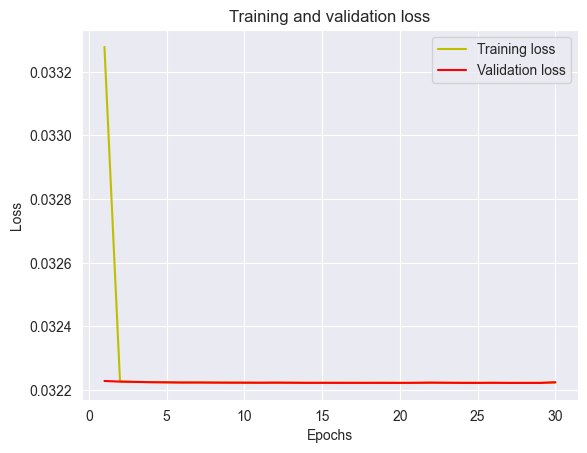

In [14]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

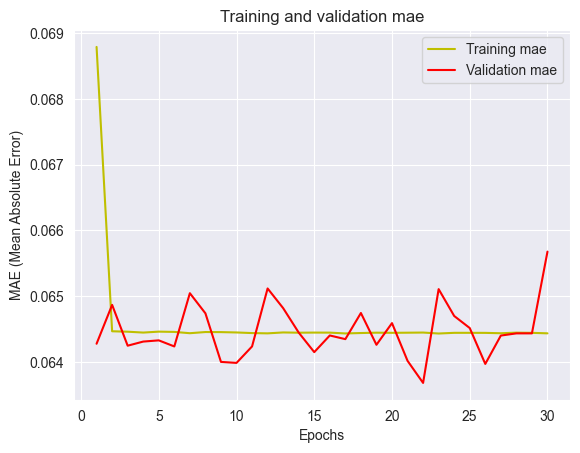

In [15]:
mae =history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.show()